## Convert regular OHLC to Renko Open Close and Plot Renko Chart
<br />
Full guide: https://renkotraders.com/trading-matters/how-to-plot-renko-charts-in-python/<br />
Credits: https://machinelearningtrading.wordpress.com/2014/02/23/plotting-renko-bars-in-python/

*** IMPORTS ***

In [202]:
import datetime
import dateutil
import pandas_datareader.data as pdr
from stocktrends import Renko

*** Get data using get_data_yahoo ***

In [203]:
year=5
ticker="^GSPC" #Input ticker here
ohlc = pdr.get_data_yahoo(ticker,start=datetime.date.today()-dateutil.relativedelta.relativedelta(years=year),end=datetime.date.today())

*** Create function df_to_renko() ***<br /> 
This will create the function where you can pass the ohlc fetched from Yahoo and n, where n = the renko box size

In [175]:
# Function to convert ohlc data into renko bricks. Pass dataframe name and brick size
def df_to_renko(data, n):
    data.reset_index(inplace=True)
    data.columns = [i.lower() for i in data.columns]
    print(data.isnull().values.any())
    df = Renko(data)
    df.brick_size = n
    renko_df = df.get_ohlc_data()
    return renko_df

*** Pass Renko converted OHLC to new dataframe *** <br />
Pass the function to a new dataframe which consists of the renko open high low close data

In [191]:
r_bars = df_to_renko(ohlc, 50)
print('# of rows in DF:',len(r_bars))

False
# of rows in DF: 182


*** Save data to excel ***

In [192]:
r_bars.to_excel("output.xlsx", index=False)

*** Create new df with just open and close values *** <br />
Takes just the open and close columns from the Renko open/high/low/close dataframe

In [193]:
new_df = r_bars[['open','close']]

*** IMPORTS *** <br/>
Import matplotlib and also use rcParams (if using Jupyter notebook to set size of chart)

In [194]:
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams["figure.figsize"] = (18,9)

*** Create the Renko chart using Matplotlib's Rectangle and patches ***

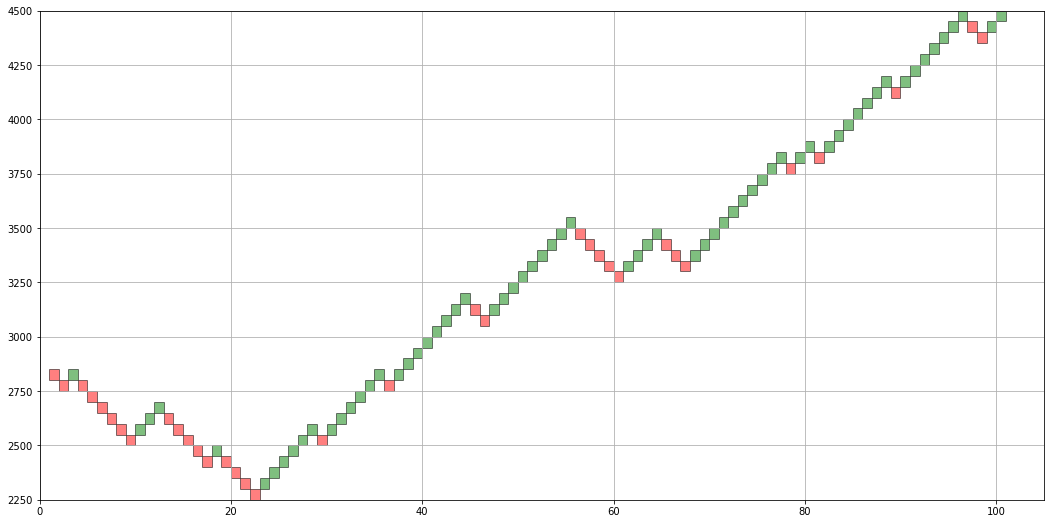

In [213]:
# create the figure
fig = plt.figure(1)
fig.clf()
axes = fig.gca()

# Add 10 extra spaces to the right
num_bars = 100
df = new_df.tail(num_bars)

renkos = zip(df['open'],df['close'])
# plot the bars, green for 'up', red for 'down'
index = 1

for open_price, close_price in renkos:
    if (open_price < close_price):
        renko = matplotlib.patches.Rectangle((index,open_price), 1, close_price-open_price, edgecolor='black', facecolor='green', alpha=0.5)
        axes.add_patch(renko)
    else:
        renko = matplotlib.patches.Rectangle((index,open_price), 1, close_price-open_price, edgecolor='black', facecolor='red', alpha=0.5)
        axes.add_patch(renko)
    index = index + 1
    
#adjust the axes
plt.xlim([0, num_bars+5])
plt.ylim([min(min(df['open']),min(df['close'])), max(max(df['open']),max(df['close']))])
plt.grid(True)
plt.show()